<a href="https://colab.research.google.com/github/prathammehta16/Training_CustomDataset_On_YoloV5/blob/main/Yolov5_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/ultralytics/yolov5  

Cloning into 'yolov5'...
remote: Enumerating objects: 14390, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 14390 (delta 24), reused 39 (delta 20), pack-reused 14342
Receiving objects: 100% (14390/14390), 13.41 MiB | 10.10 MiB/s, done.
Resolving deltas: 100% (9925/9925), done.


In [ ]:
!unzip /content/gdrive/MyDrive/SGP_2022/DATA_10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: DATA_10000/txt_10000/imgN1_294.txt  
  inflating: DATA_10000/txt_10000/imgN1_295.txt  
  inflating: DATA_10000/txt_10000/imgN1_296.txt  
  inflating: DATA_10000/txt_10000/imgN1_297.txt  
  inflating: DATA_10000/txt_10000/imgN1_298.txt  
  inflating: DATA_10000/txt_10000/imgN1_299.txt  
  inflating: DATA_10000/txt_10000/imgN1_3.txt  
  inflating: DATA_10000/txt_10000/imgN1_30.txt  
  inflating: DATA_10000/txt_10000/imgN1_300.txt  
  inflating: DATA_10000/txt_10000/imgN1_301.txt  
  inflating: DATA_10000/txt_10000/imgN1_302.txt  
  inflating: DATA_10000/txt_10000/imgN1_303.txt  
  inflating: DATA_10000/txt_10000/imgN1_304.txt  
  inflating: DATA_10000/txt_10000/imgN1_305.txt  
  inflating: DATA_10000/txt_10000/imgN1_306.txt  
  inflating: DATA_10000/txt_10000/imgN1_307.txt  
  inflating: DATA_10000/txt_10000/imgN1_308.txt  
  inflating: DATA_10000/txt_10000/imgN1_309.txt  
  inflating: DATA_10000/txt_10000/imgN1_31.txt  
  i

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/DATA_10000', output="output2", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 20974 files [00:53, 392.14 files/s] 


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
%pip install -qr requirements.txt  

     |████████████████████████████████| 1.6 MB 42.6 MB/s 


In [ ]:
%cd yolov5
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

YOLOv5 🚀 v6.2-198-gacff977 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 51.9/78.2 GB disk)


In [ ]:
def create_data_directories(data_name):
  Path(f"../datasets/{data_name}/images/train").mkdir(parents=True, exist_ok=True)
  Path(f"../datasets/{data_name}/images/valid").mkdir(parents=True, exist_ok=True)
  Path(f"../datasets/{data_name}/images/test").mkdir(parents=True, exist_ok=True)
  Path(f"../datasets/{data_name}/labels/train").mkdir(parents=True, exist_ok=True)
  Path(f"../datasets/{data_name}/labels/valid").mkdir(parents=True, exist_ok=True)
  Path(f"../datasets/{data_name}/labels/test").mkdir(parents=True, exist_ok=True)

create_data_directories('Vehicle_data')

In [ ]:
!cat data/penguins_data.yaml
print ('---------------------------------------------')

In [ ]:
!python train.py --batch 5 --epochs 50 --data 'data/penguins_data.yaml' --weights 'yolov5s6.pt' --project 'runs_penguins' --name 'feature_extraction' --cache --freeze 12
#clear_output()

train: weights=yolov5s6.pt, cfg=, data=data/penguins_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=5, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_penguins, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-198-gacff977 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

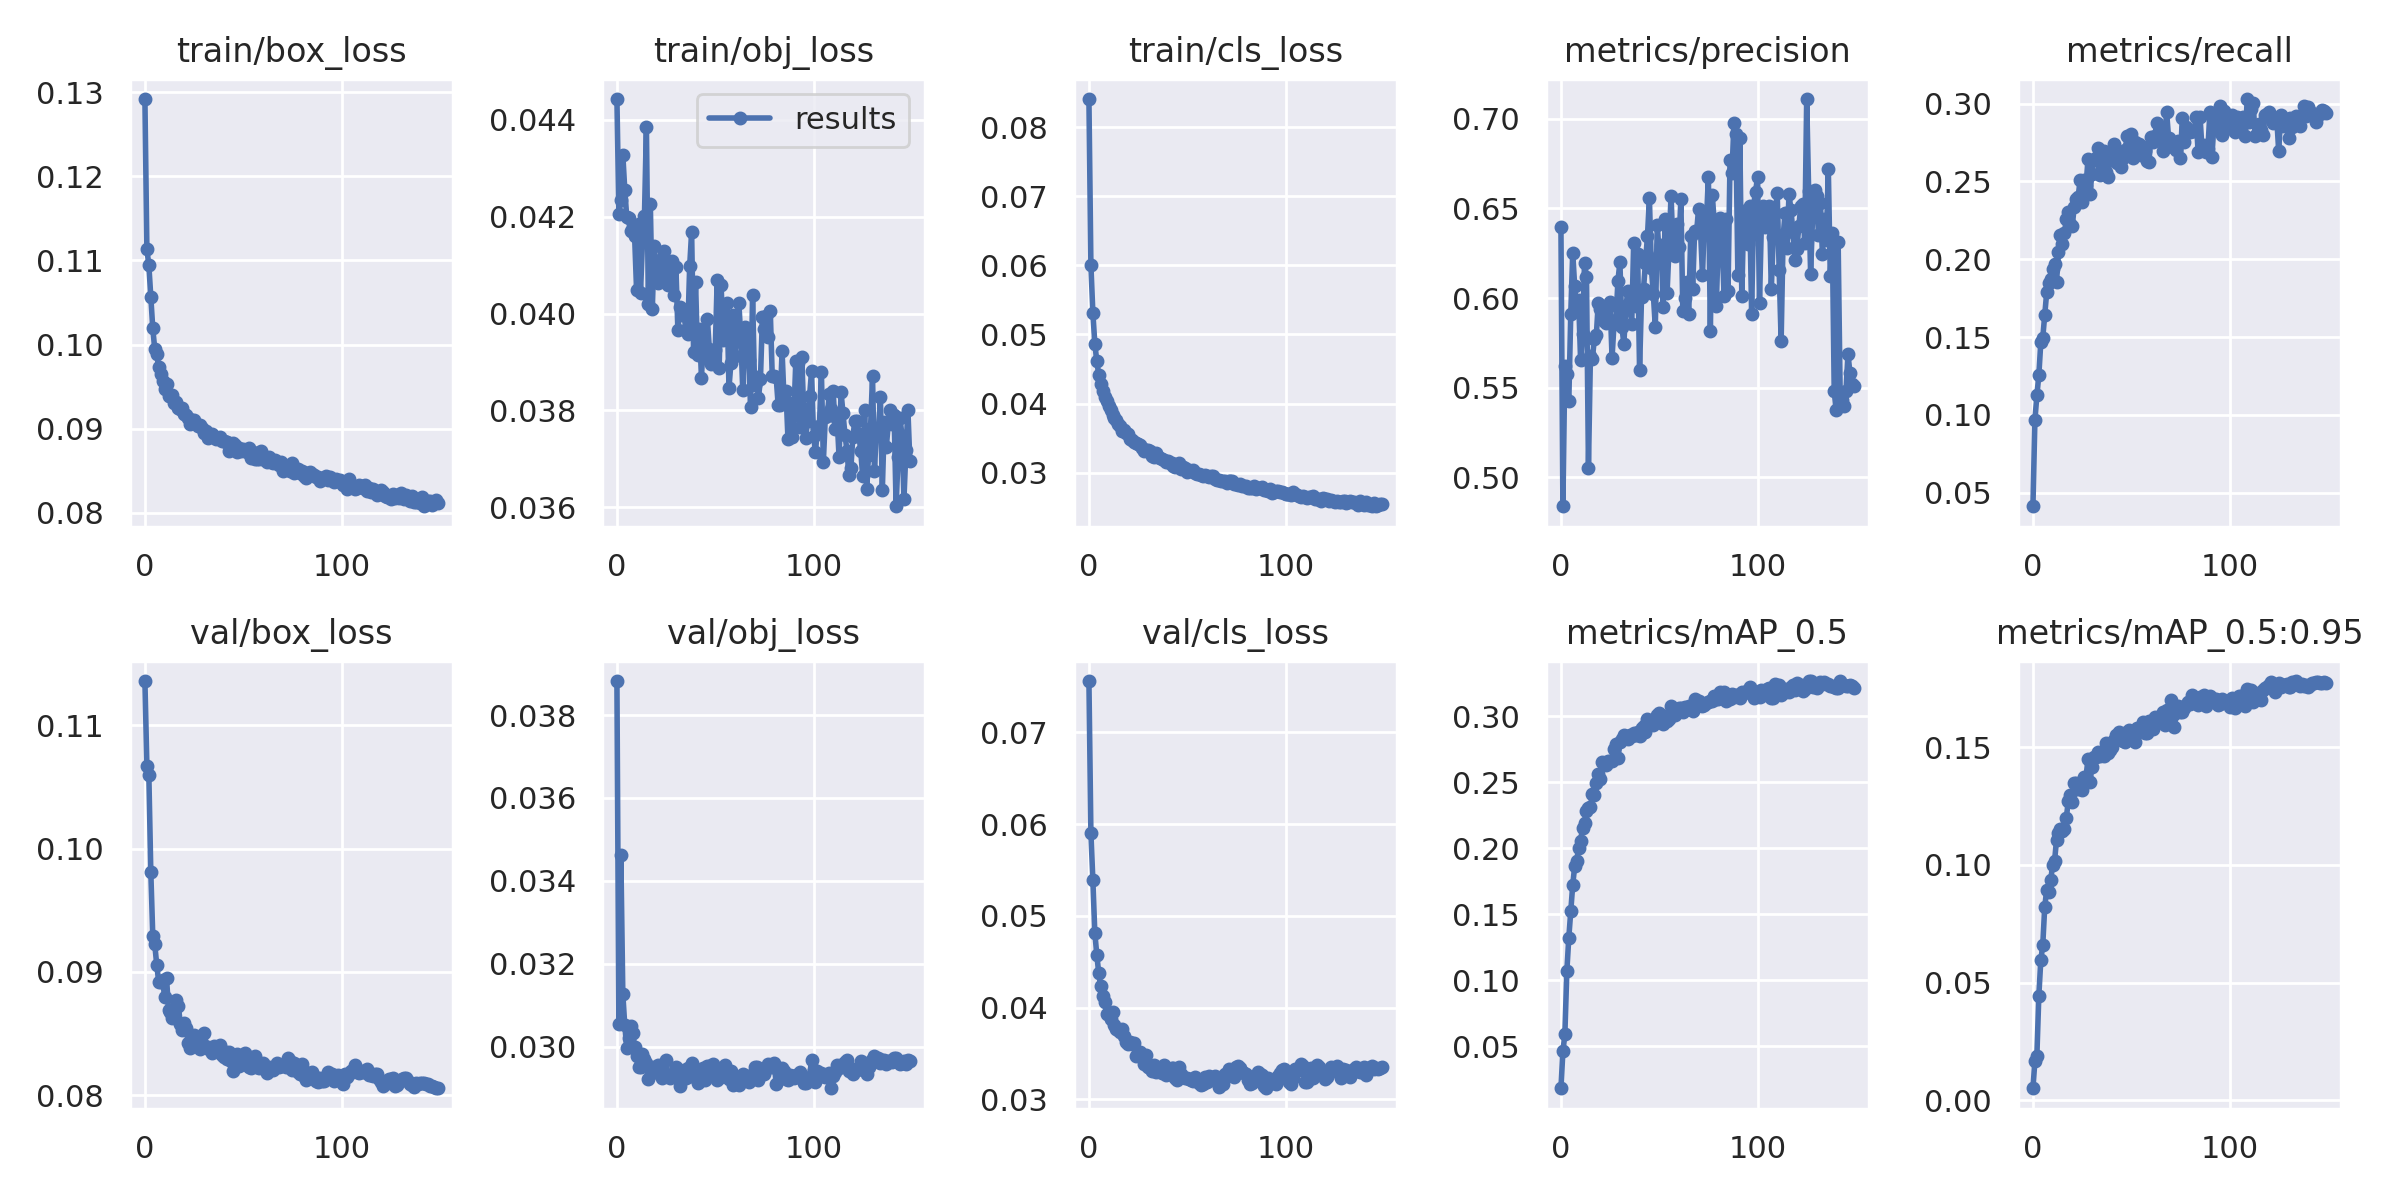

In [ ]:
     display.Image(f"runs_penguins/feature_extraction/results.png")

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!python train.py --hyp '/content/yolov5/data/hyps/hyp.scratch-low.yaml' --batch 16 --epochs 100 --data 'data/penguins_data.yaml' --weights 'runs_penguins/feature_extraction/weights/best.pt' --project 'runs_penguins' --name 'fine-tuning' --cache
#clear_output()

train: weights=runs_penguins/feature_extraction/weights/best.pt, cfg=, data=data/penguins_data.yaml, hyp=/content/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_penguins, name=fine-tuning, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-159-gd669a74 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.

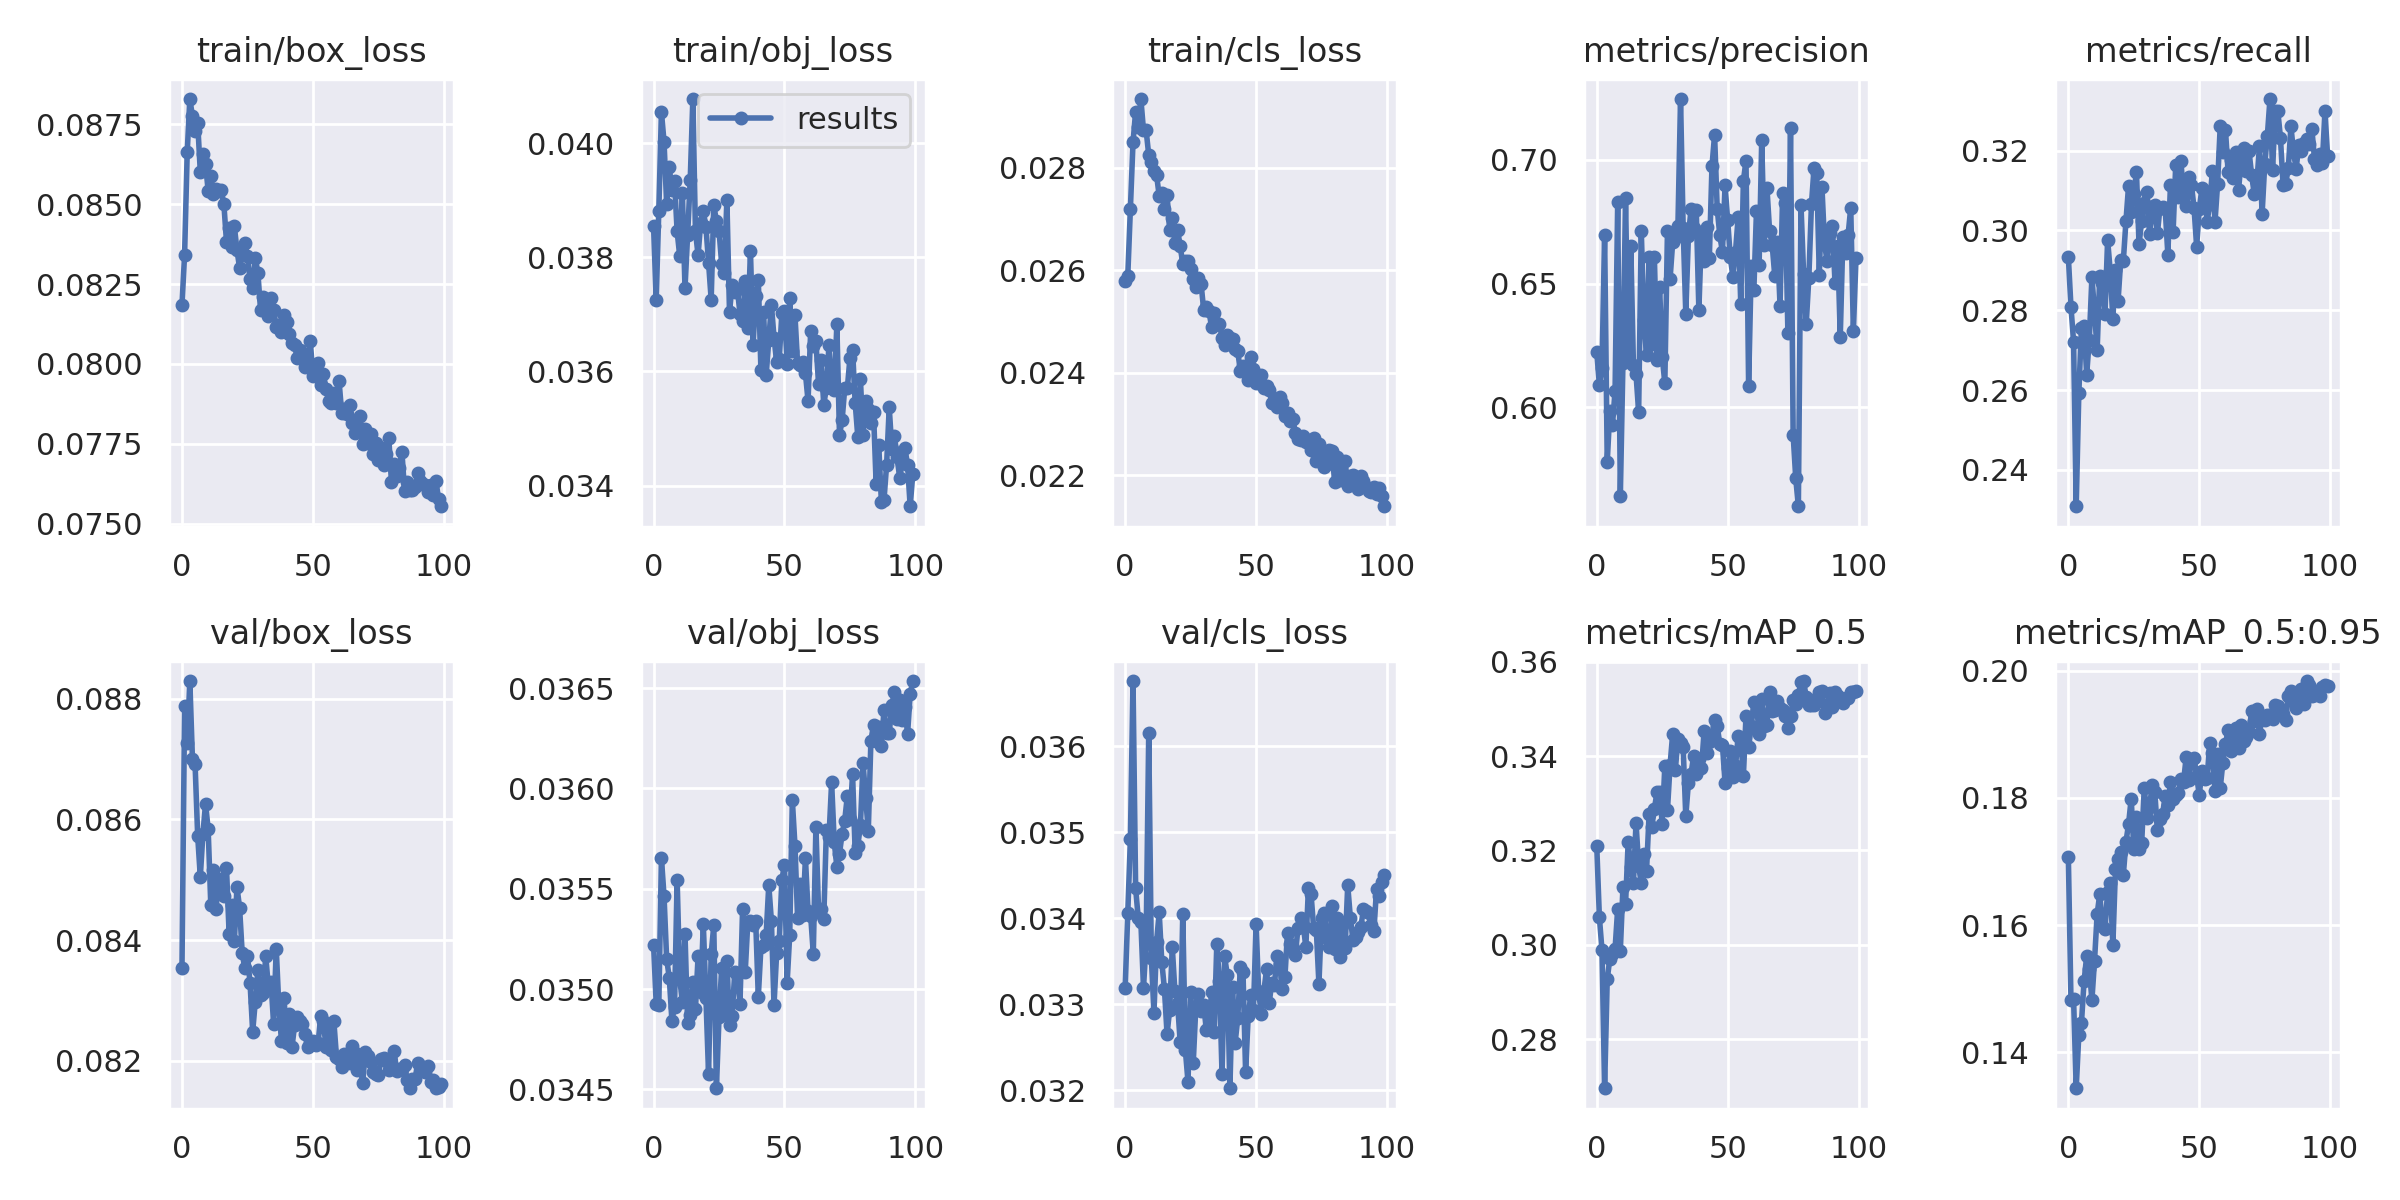

In [ ]:
display.Image(f"runs_penguins/fine-tuning2/results.png")

In [ ]:
!python val.py --weights 'runs_penguins/fine-tuning2/weights/best.pt' --batch 64 --data 'data/penguins_data.yaml' --task test --project 'runs_penguins' --name 'validation_on_test_data' --augment
#clear_output()

val: data=data/penguins_data.yaml, weights=['runs_penguins/fine-tuning2/weights/best.pt'], batch_size=64, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs_penguins, name=validation_on_test_data, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-159-gd669a74 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 206 layers, 12458428 parameters, 0 gradients, 16.5 GFLOPs
test: Scanning '/content/yolov5/datasets/Vehicle_data/labels/test' images and labels...198 found, 0 missing, 0 empty, 0 corrupt: 100% 198/198 [00:00<00:00, 323.15it/s]
test: New cache created: /content/yolov5/datasets/Vehicle_data/labels/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:14<00:00,  3.54s/it]
                   all        198       3308  

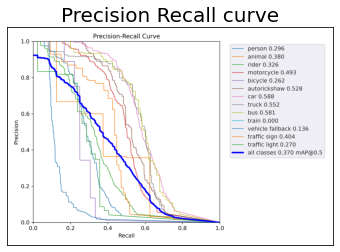

In [ ]:
plt.plot(figsize=(20,20))
plt.title('Precision Recall curve', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('runs_penguins/validation_on_test_data3/PR_curve.png'))

In [ ]:

!python detect.py --weights 'runs_penguins/fine-tuning2/weights/best.pt'  --conf 0.6 --source '/content/yolov5/datasets/Vehicle_data/images/test' --project 'runs_penguins' --name 'detect_test' --augment --line=3
#clear_output()

detect: weights=['runs_penguins/fine-tuning2/weights/best.pt'], source=/content/yolov5/datasets/Vehicle_data/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs_penguins, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-159-gd669a74 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 206 layers, 12458428 parameters, 0 gradients, 16.5 GFLOPs
image 1/198 /content/yolov5/datasets/Vehicle_data/images/test/imgA_120.jpg: 512x640 1 motorcycle, 1 truck, 52.0ms
image 2/198 /content/yolov5/datasets/Vehicle_data/images/test/imgA_13.jpg: 512x640 1 autorickshaw, 1 truck, 37.7ms
image 3/198 /content/yolov5/datasets/Vehicle_data/images/test/imgA

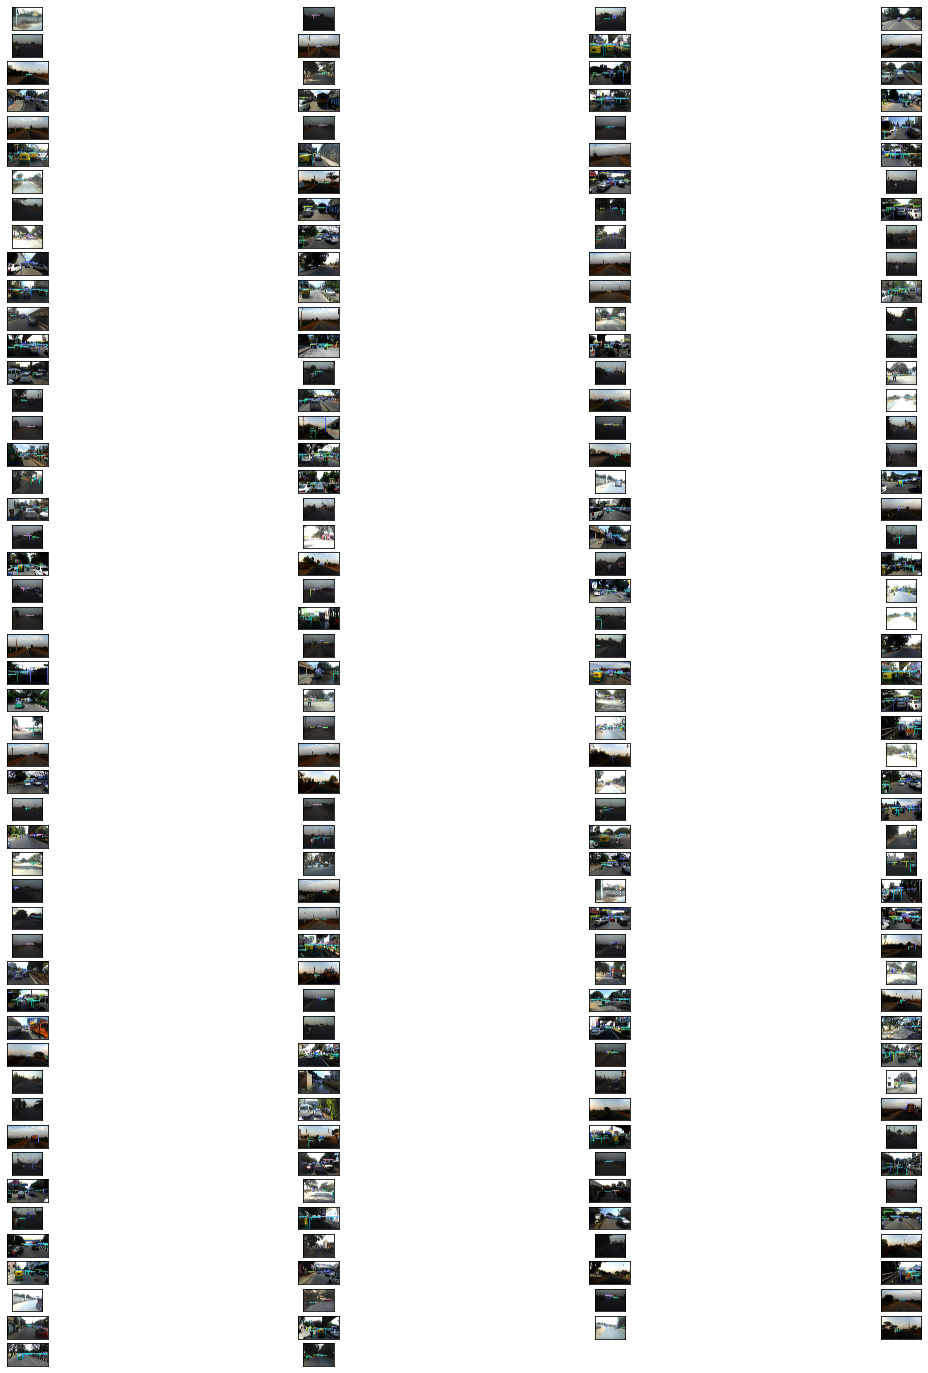

In [ ]:
detect_path = r'runs_penguins/detect_test3'

images = []
for img_path in glob.glob(detect_path + '/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,25))
columns = 4
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)

In [ ]:
%cd yolov5

/content/yolov5


In [ ]:

!python detect.py --weights '/content/yolov5/best_yolov5.pt'  --conf 0.6 --source '/content/yolov5/200.png' --project 'runs_penguins' --name 'detect_test' --augment --line=3
#clear_output()

detect: weights=['/content/yolov5/best_yolov5.pt'], source=/content/yolov5/200.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs_penguins, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirement "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.2-224-g82a5585 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7118005 parameters, 0 gradients
image 1/1 /content/yo

In [ ]:

!python detect.py --weights '/content/yolov5/best_yolov5.pt'  --conf 0.6 --source '/content/yolov5/India - 8698.mp4' --project 'runs_penguins' --name 'detect_test' --augment --line=3
#clear_output()

detect: weights=['/content/yolov5/best_yolov5.pt'], source=/content/yolov5/India - 8698.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs_penguins, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-224-g82a5585 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7118005 parameters, 0 gradients
video 1/1 (1/1170) /content/yolov5/India - 8698.mp4: 384x640 4 persons, 3 motorcycles, 6 autorickshaws, 5 cars, 45.3ms
video 1/1 (2/1170) /content/yolov5/India - 8698.mp4: 384x640 1 person, 4 motorcycles, 5 autorickshaws, 4 cars, 24.8ms
video 1/1 (3/1170) /content/yolov5/India - 8698.mp4: 384x640 4 persons, 1 rider, 5 motorcycles, 4 aut

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "/content/yolov5/runs_penguins/detect_test2/India - 8698.mp4"

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(save_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)